In [1]:
import torch

print(torch.cuda.is_available())

True


In [3]:
import torchvision
import torch

print(torchvision.__version__)
print(torch.__version__)

0.20.0+cu118
2.5.0+cu118


In [2]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
model = YOLO("./src/yolov8n.pt").to('cpu')

# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [3]:
image_dir = './dataset/car.jpg'

result = model.predict(image_dir)


image 1/1 /home/octoopt/Desktop/CodingLab/Personal/yolo-detect/dataset/car.jpg: 448x640 43 cars, 1 bus, 2 trucks, 104.2ms
Speed: 5.8ms preprocess, 104.2ms inference, 24.3ms postprocess per image at shape (1, 3, 448, 640)


In [5]:
result[0].__dict__.keys()

dict_keys(['orig_img', 'orig_shape', 'boxes', 'masks', 'probs', 'keypoints', 'obb', 'speed', 'names', 'path', 'save_dir', '_keys'])

In [6]:
import re
import urllib

import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_image(payload:str) -> np.ndarray: 
    try: 
        if payload.startswith('http'): 
            content = urllib.request.urlopen(payload)
            content = np.asarray(bytearray(content.read()), dtype=np.uint8)
            content = cv2.imdecode(content, -1) # 'Load it as it is'
        else: 
            content=cv2.imread(payload)
        payload = cv2.cvtColor(content, cv2.COLOR_BGR2RGB)
        return payload
    except Exception as e: 
        raise e 

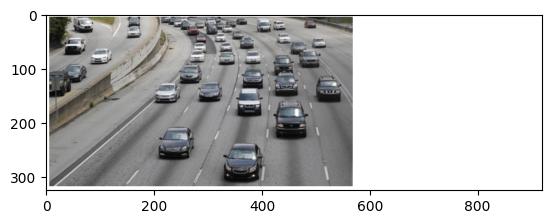

In [7]:
url = "https://editor.analyticsvidhya.com/uploads/133971.png"
img = get_image(payload=url)


#Displaying image using plt.imshow() method
plt.imshow(img)

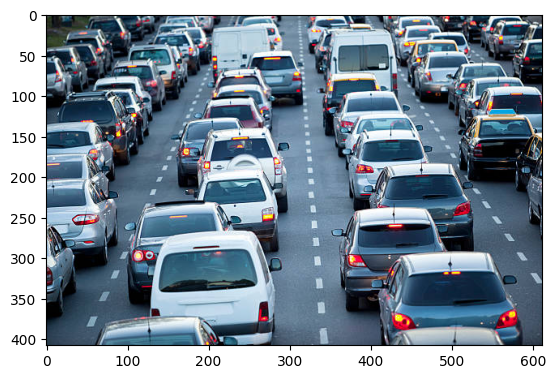

In [21]:
img = get_image(payload='./dataset/car.jpg')


#Displaying image using plt.imshow() method
plt.imshow(img)

In [31]:
import json
import requests

# Data to be sent in JSON format
data = {
    "image": "https://editor.analyticsvidhya.com/uploads/133971.png"
}

url = 'http://0.0.0.0:8080/detect'
# Send the POST request
response = requests.post(url, 
                         json=json.dumps(data))
print(response.status_code)
print("Post created successfully!")
print(response.json())  # Print the response data (e.g., new post ID)
# # Check for successful response
# if response.status_code == 201:  # 201 Created

# else:
#     print(f"Error creating post: {response.status_code}")
#     print(response.text)  # Print the error message

200
Post created successfully!
{'conf': [0.7613555788993835, 0.7498694062232971, 0.7437856793403625, 0.7389394044876099, 0.7100882530212402, 0.6807766556739807, 0.6596764326095581, 0.6407026052474976, 0.6269498467445374, 0.6207770109176636, 0.599244236946106, 0.443462997674942, 0.4240376651287079, 0.4238739013671875, 0.40699753165245056, 0.3984823524951935, 0.38035160303115845, 0.3374730050563812, 0.3029315173625946, 0.30016350746154785, 0.28003111481666565, 0.2682076096534729, 0.2508968412876129], 'cls': ['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car']}


In [39]:
requests.get('http://0.0.0.0:8080/')

<Response [200]>

In [ ]:
from detect.api import get_image


image = get_image("https://editor.analyticsvidhya.com/uploads/133971.png")
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
import json

image = get_image("https://editor.analyticsvidhya.com/uploads/133971.png")

# Data to be sent in JSON format
data = {
    "image": image.tobytes()
}

url = 'http://localhost:8080/detect'
# Send the POST request
response = requests.post(url, 
                        #  json=json.dumps(data), 
                         data=data)
# Check for successful response
if response.status_code == 201:  # 201 Created
    print(response.status_code)
    print("Post created successfully!")
    print(response.json())  # Print the response data (e.g., new post ID)
else:
    print(f"Error creating post: {response.status_code}")
    print(response.text)  # Print the error message

Error creating post: 500
Internal Server Error


In [17]:
import uuid
my_uuid = uuid.uuid4()

type(my_uuid.hex)

str